# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

# Read Dataset

In [2]:
df=pd.read_csv(r"C:\Users\akshi\Documents\data set\brain_stroke -.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Check Datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Check Null values 

In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

# Delete unwanted Features.

In [8]:
del df["Residence_type"]
del df["gender"]

In [9]:
df["stroke"].count()

4981

In [10]:
df["stroke"].unique()

array([1, 0], dtype=int64)

# Data transform into integer value by using Lable Encoder  

In [11]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
df["ever_married"]=L1.fit_transform(df["ever_married"])
df["smoking_status"]=L1.fit_transform(df["smoking_status"])
df["work_type"]=L1.fit_transform(df["work_type"])
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,1,228.69,36.6,1,1
1,80.0,0,1,1,1,105.92,32.5,2,1
2,49.0,0,0,1,1,171.23,34.4,3,1
3,79.0,1,0,1,2,174.12,24.0,2,1
4,81.0,0,0,1,1,186.21,29.0,1,1


In [12]:
df.skew()

age                 -0.144001
hypertension         2.740377
heart_disease        3.896191
ever_married        -0.668689
work_type            0.651535
avg_glucose_level    1.587526
bmi                  0.371553
smoking_status      -0.039583
stroke               4.140942
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

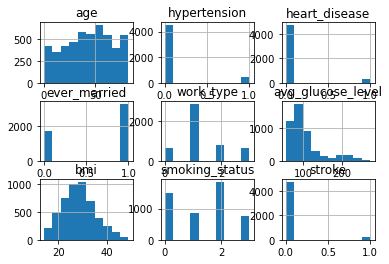

In [13]:
df.hist()

# Independent and Dependent variable

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Standardisation

In [15]:
from sklearn.preprocessing import MinMaxScaler
m1=MinMaxScaler()
s=m1.fit_transform(x)

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

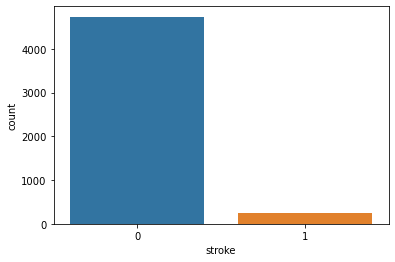

In [16]:
import seaborn as sns
sns.countplot(df["stroke"])

In [17]:
from collections import Counter
print(Counter(y))

Counter({0: 4733, 1: 248})


# Imbalancing technique
# SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [19]:
from collections import Counter
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


# Split the Data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=100)

In [21]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 3792, 1: 3780})
Counter({1: 953, 0: 941})


# Cross validation Technique

In [22]:
from sklearn.model_selection import KFold
k2=KFold(n_splits=5,random_state=100,shuffle=True)
k2.get_n_splits(s)
print(k2)

KFold(n_splits=5, random_state=100, shuffle=True)


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
l1=LogisticRegression()
y_pred=cross_val_predict(l1,x_train,y_train,cv=k2)
print(y_pred)
score=cross_val_score(l1,x_train,y_train,cv=k2)
print(score)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[1 0 1 ... 1 0 1]


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.7960396  0.78811881 0.80449141 0.81109643 0.79722589]


# Logistic Regression.

In [24]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)
l1_pred=l1.predict(x_test)
print("Predicted value",l1_pred)
l1_score=accuracy_score(l1_pred,y_test)*100
print("Accuracy",l1_score)

Predicted value [0 1 0 ... 1 0 0]
Accuracy 79.98944033790919


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier()
k1.fit(x_train,y_train)
k1_pred=k1.predict(x_test)
print("Predicted value",k1_pred)
k1_score=accuracy_score(k1_pred,y_test)*100
print("Accuracy Score",k1_score)

Predicted value [0 1 1 ... 1 0 0]
Accuracy Score 88.80675818373813


# SVM

In [26]:
from sklearn.svm import SVC
s1=SVC()
s1.fit(x_train,y_train)
s1_pred=s1.predict(x_test)
print("predicted value",s1_pred)
s1_score=accuracy_score(s1_pred,y_test)*100
print("Accuracy",s1_score)

predicted value [0 1 0 ... 0 0 1]
Accuracy 76.87434002111932


# Ensemble Technique

In [27]:
from sklearn.ensemble import VotingClassifier
v1=VotingClassifier(estimators=[("Logistic",l1),("KNN",k1),("SVM",s1)])
v1.fit(x_train,y_train)
v1_pred=v1.predict(x_test)
print("prediction",v1_pred)
v1_score=accuracy_score(y_test,v1_pred)*100
print("Accuracy",v1_score)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prediction [0 1 0 ... 1 0 0]
Accuracy 81.73178458289335


# Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
b1=BaggingClassifier(base_estimator=l1,n_estimators=5,random_state=25)
b1.fit(x_train,y_train)
b1_pred=b1.predict(x_test)
print("predicted value",b1_pred)
b1_score=accuracy_score(y_test,b1_pred)*100
print("Accuracy Score",b1_score)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

predicted value [0 1 0 ... 1 0 0]
Accuracy Score 80.14783526927138


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_estimators=5,random_state=3)
R.fit(x_train,y_train)
R_pred=R.predict(x_test)
print("predict value",R_pred)
R_score=accuracy_score(y_test,R_pred)*100
print("Accuracy score",R_score)

predict value [0 1 1 ... 1 0 0]
Accuracy score 90.60190073917634


# Confusion Matrix

In [30]:
# Confusion matrix for random forest.
from sklearn.metrics import confusion_matrix,accuracy_score
cs=confusion_matrix(y_test,R_pred)
cs

array([[820, 121],
       [ 57, 896]], dtype=int64)

In [31]:
# Confusion matrix for Logistic Regression. 
from sklearn.metrics import confusion_matrix,accuracy_score
cs=confusion_matrix(y_test,l1_pred)
cs

array([[708, 233],
       [146, 807]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,R_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       941
           1       0.88      0.94      0.91       953

    accuracy                           0.91      1894
   macro avg       0.91      0.91      0.91      1894
weighted avg       0.91      0.91      0.91      1894



# In given brain stroke prediction data we use many classifier for predict the  Brain stroke like Logistic , KNN,SVM, Random Forest . In that Random Forest given maximum accuracy as compare to other models.So we say that Random Forest is best fitted . 
      
# we use Standardisation,Lable Encoder, SMOTE, Cross validation technique for accuracy increasing porpose.

# So Random forest gives the 90% accuracy and  Overall model accuracy is is 91%
